## CS818 Assessment: notebook 4
To conclude, I will now complete supervised analysis

In [13]:
# Import required packages for project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Load data
df_cluster = pd.read_csv("df_cluster.csv")

# Reverse encoding of NObeyesdad (obesity rate) column
nobeyesdad_cols = [col for col in df_cluster.columns if col.startswith('NObeyesdad')]

# And recombine it into a single categorical column
df_cluster['NObeyesdad'] = df_cluster[nobeyesdad_cols].idxmax(axis=1)
df_cluster['NObeyesdad'] = df_cluster['NObeyesdad'].str.replace('NObeyesdad_', '')
df_cluster.drop(columns=nobeyesdad_cols, inplace=True)

Now the data is ready for decision-tree analysis. First will be an analysis of the full dataset

Decision Tree Accuracy (with Cluster): 0.92

Classification Report:
                      precision    recall  f1-score   support

      Normal_Weight       0.94      0.97      0.95       179
     Obesity_Type_I       0.93      0.88      0.90       102
    Obesity_Type_II       0.93      0.95      0.94        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.87      0.81      0.84        88
Overweight_Level_II       0.86      0.90      0.88        79

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



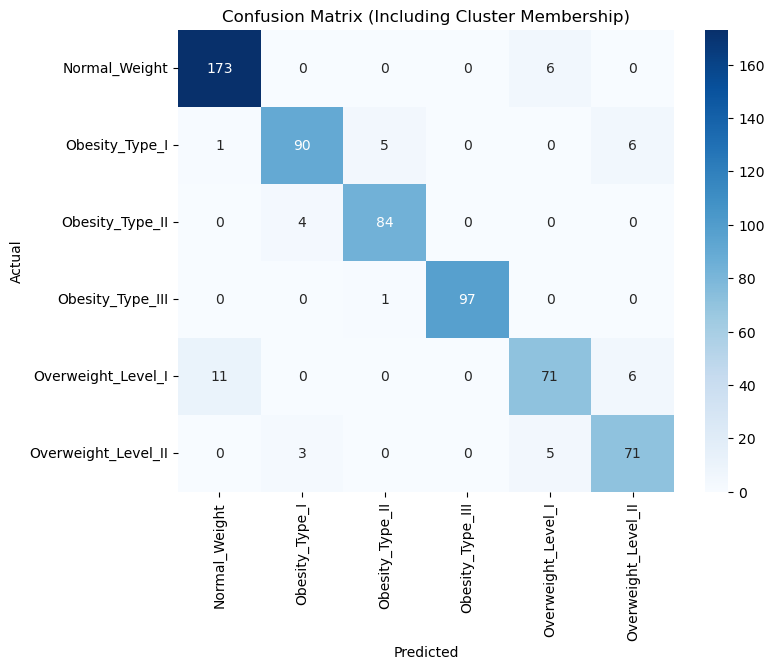

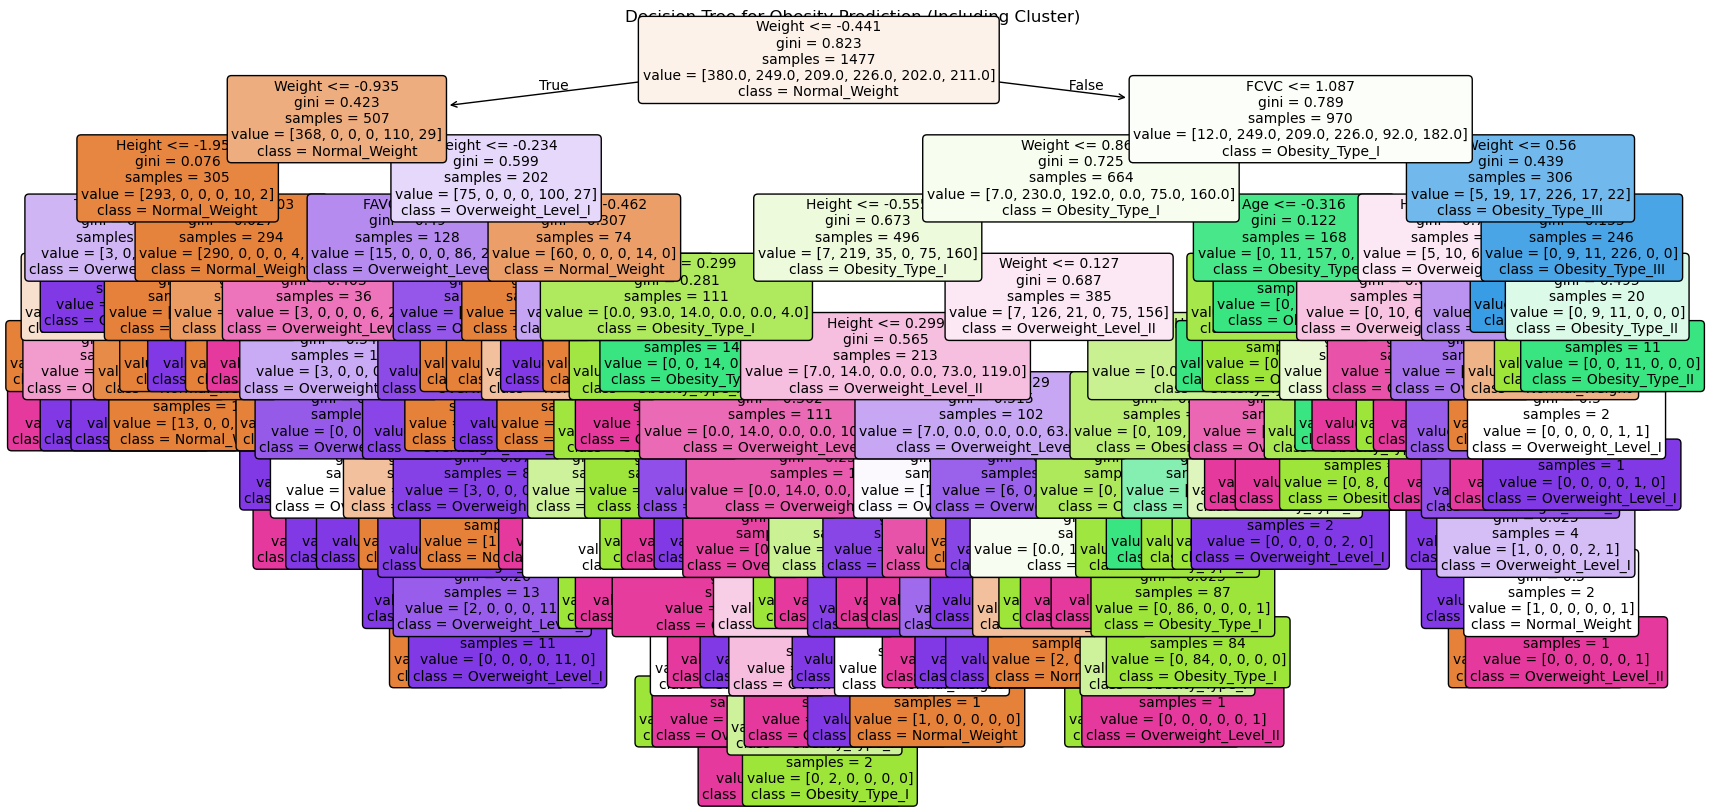

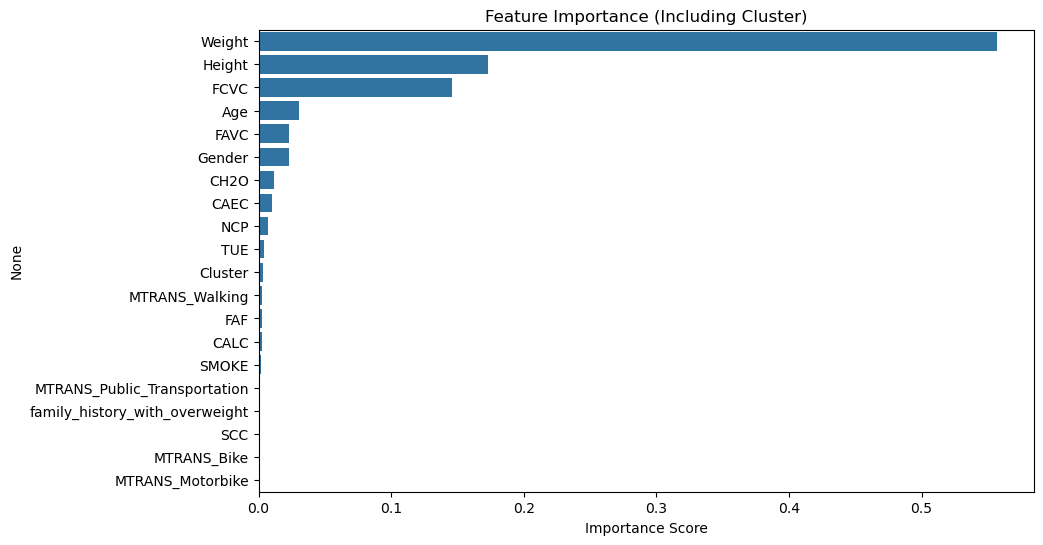

  Feature  Importance
0  Weight    0.556573
1  Height    0.172755
2    FCVC    0.145888
3     Age    0.030701
4    FAVC    0.023347


In [14]:
X = df_cluster.drop(columns=['NObeyesdad']) 
y = df_cluster['NObeyesdad'] 

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with Cluster): {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.title("Confusion Matrix (Including Cluster Membership)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision tree visualisation
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Obesity Prediction (Including Cluster)")
plt.show()

# Feature importance
importances = pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Including Cluster)")
plt.xlabel("Importance Score")
plt.show()

# I also want a quick overview of the most important features
df_importance = pd.DataFrame({
    'Feature': importances.index,
    'Importance': importances.values
})

top_n = 5
df_top_features = df_importance.head(top_n)
print(df_top_features)

Weight is unsurpsisingly most significant, followed by height. I'd like to rerun with these excluded. I will also remove the demographic characteristics of age and gender to focus in on lifestyle factors and see how those shape obesity

Decision Tree Accuracy (with Cluster): 0.74

Classification Report:
                      precision    recall  f1-score   support

      Normal_Weight       0.76      0.79      0.77       179
     Obesity_Type_I       0.66      0.64      0.65       102
    Obesity_Type_II       0.85      0.85      0.85        88
   Obesity_Type_III       0.97      0.98      0.97        98
 Overweight_Level_I       0.63      0.55      0.59        88
Overweight_Level_II       0.51      0.54      0.52        79

           accuracy                           0.74       634
          macro avg       0.73      0.73      0.73       634
       weighted avg       0.74      0.74      0.74       634



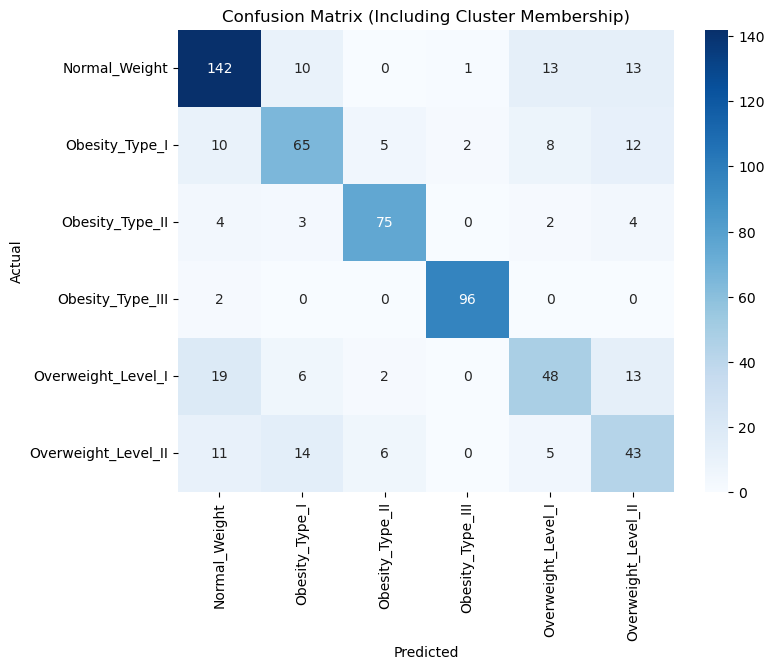

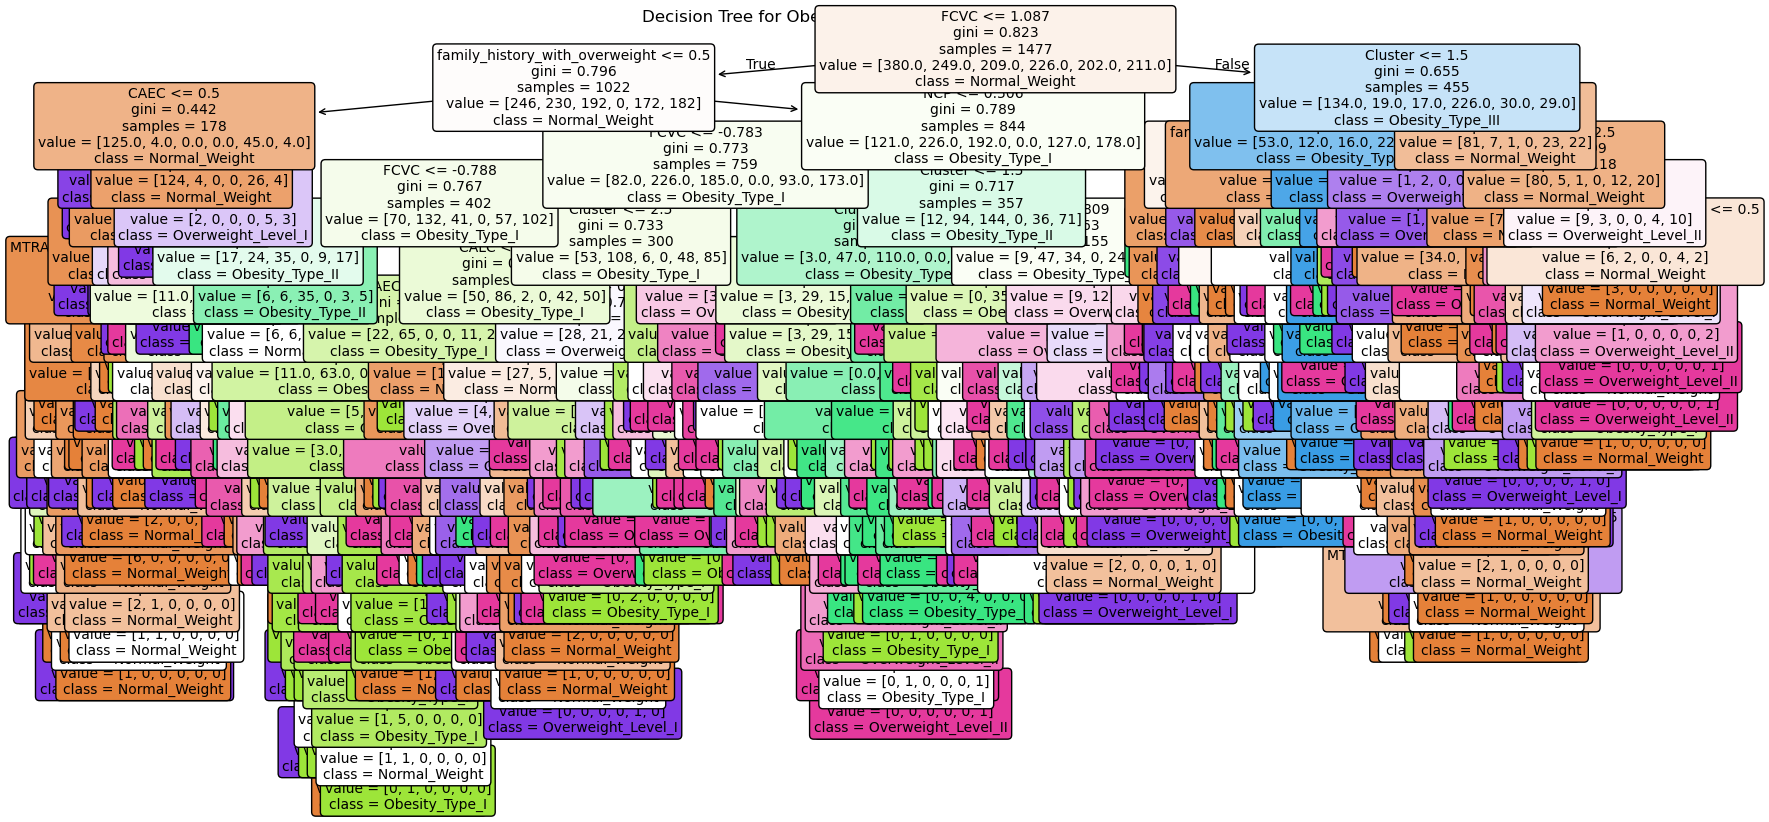

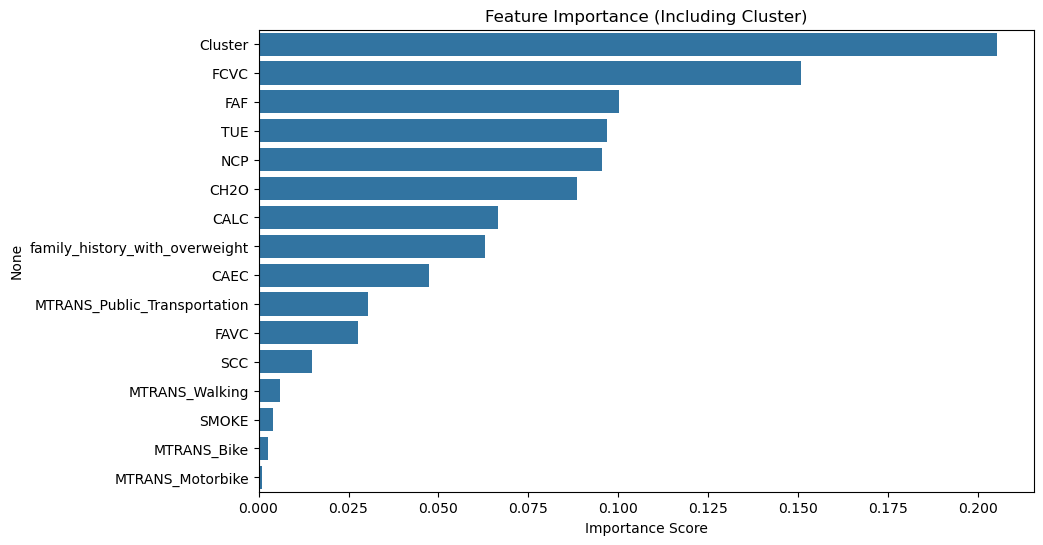

   Feature  Importance
0  Cluster    0.205089
1     FCVC    0.150636
2      FAF    0.100055
3      TUE    0.096851
4      NCP    0.095402


In [15]:
X = df_cluster.drop(columns=['NObeyesdad', 'Weight', 'Height', 'Age', 'Gender'])  
y = df_cluster['NObeyesdad'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with Cluster): {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.title("Confusion Matrix (Including Cluster Membership)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Obesity Prediction (Including Cluster)")
plt.show()

importances = pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Including Cluster)")
plt.xlabel("Importance Score")
plt.show()

df_importance = pd.DataFrame({
    'Feature': importances.index,
    'Importance': importances.values
})

top_n = 5 
df_top_features = df_importance.head(top_n)
print(df_top_features)

And finally I'd like to see the results with cluster removed as a category 

Decision Tree Accuracy (with Cluster): 0.72

Classification Report:
                      precision    recall  f1-score   support

      Normal_Weight       0.77      0.78      0.78       179
     Obesity_Type_I       0.62      0.56      0.59       102
    Obesity_Type_II       0.80      0.84      0.82        88
   Obesity_Type_III       0.96      0.98      0.97        98
 Overweight_Level_I       0.48      0.47      0.47        88
Overweight_Level_II       0.55      0.58      0.57        79

           accuracy                           0.72       634
          macro avg       0.70      0.70      0.70       634
       weighted avg       0.71      0.72      0.71       634



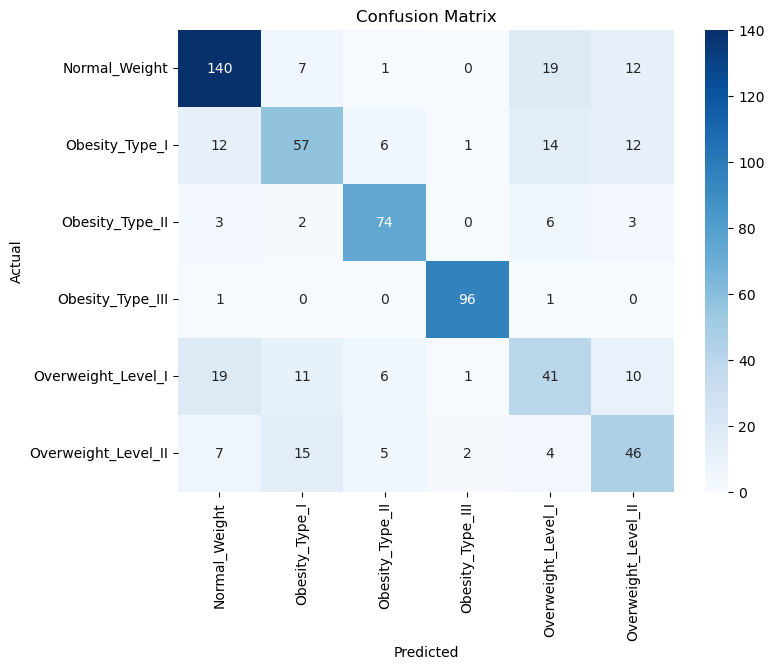

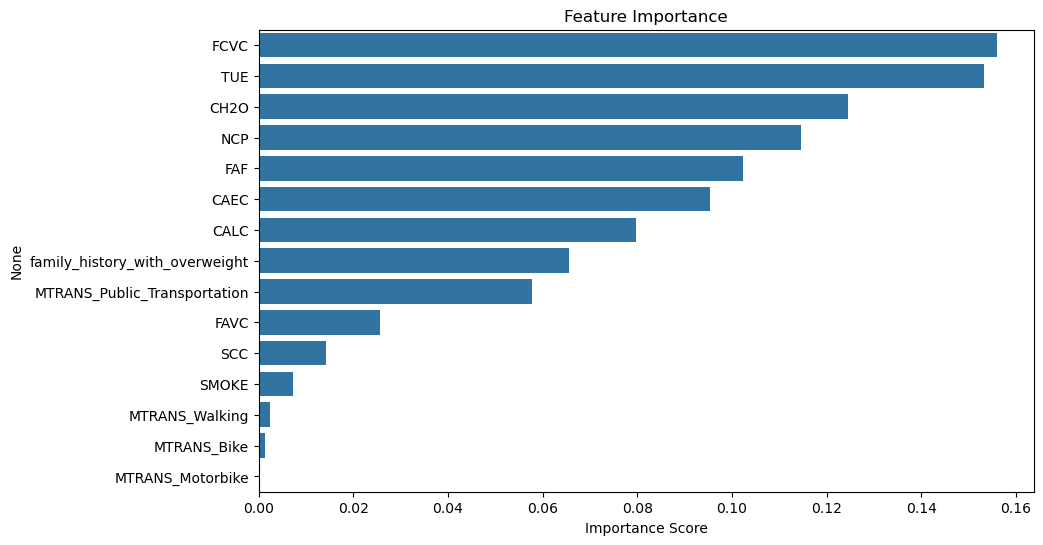

  Feature  Importance
0    FCVC    0.155933
1     TUE    0.153289
2    CH2O    0.124550
3     NCP    0.114702
4     FAF    0.102248


In [16]:
X = df_cluster.drop(columns=['NObeyesdad', 'Weight', 'Height', 'Age', 'Gender', 'Cluster'])
y = df_cluster['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with Cluster): {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.pdf")
plt.show()

importances = pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.savefig("feature_importance.pdf")
plt.show()

df_importance = pd.DataFrame({
    'Feature': importances.index,
    'Importance': importances.values
})

top_n = 5 
df_top_features = df_importance.head(top_n)
print(df_top_features)

Finally, without setting a max-depth for the branches, the decision-tree is not easily intepretable. To facilitate easier visualisation and to create something that can be used in the assessment, I'll create a version with a restricted number of branches

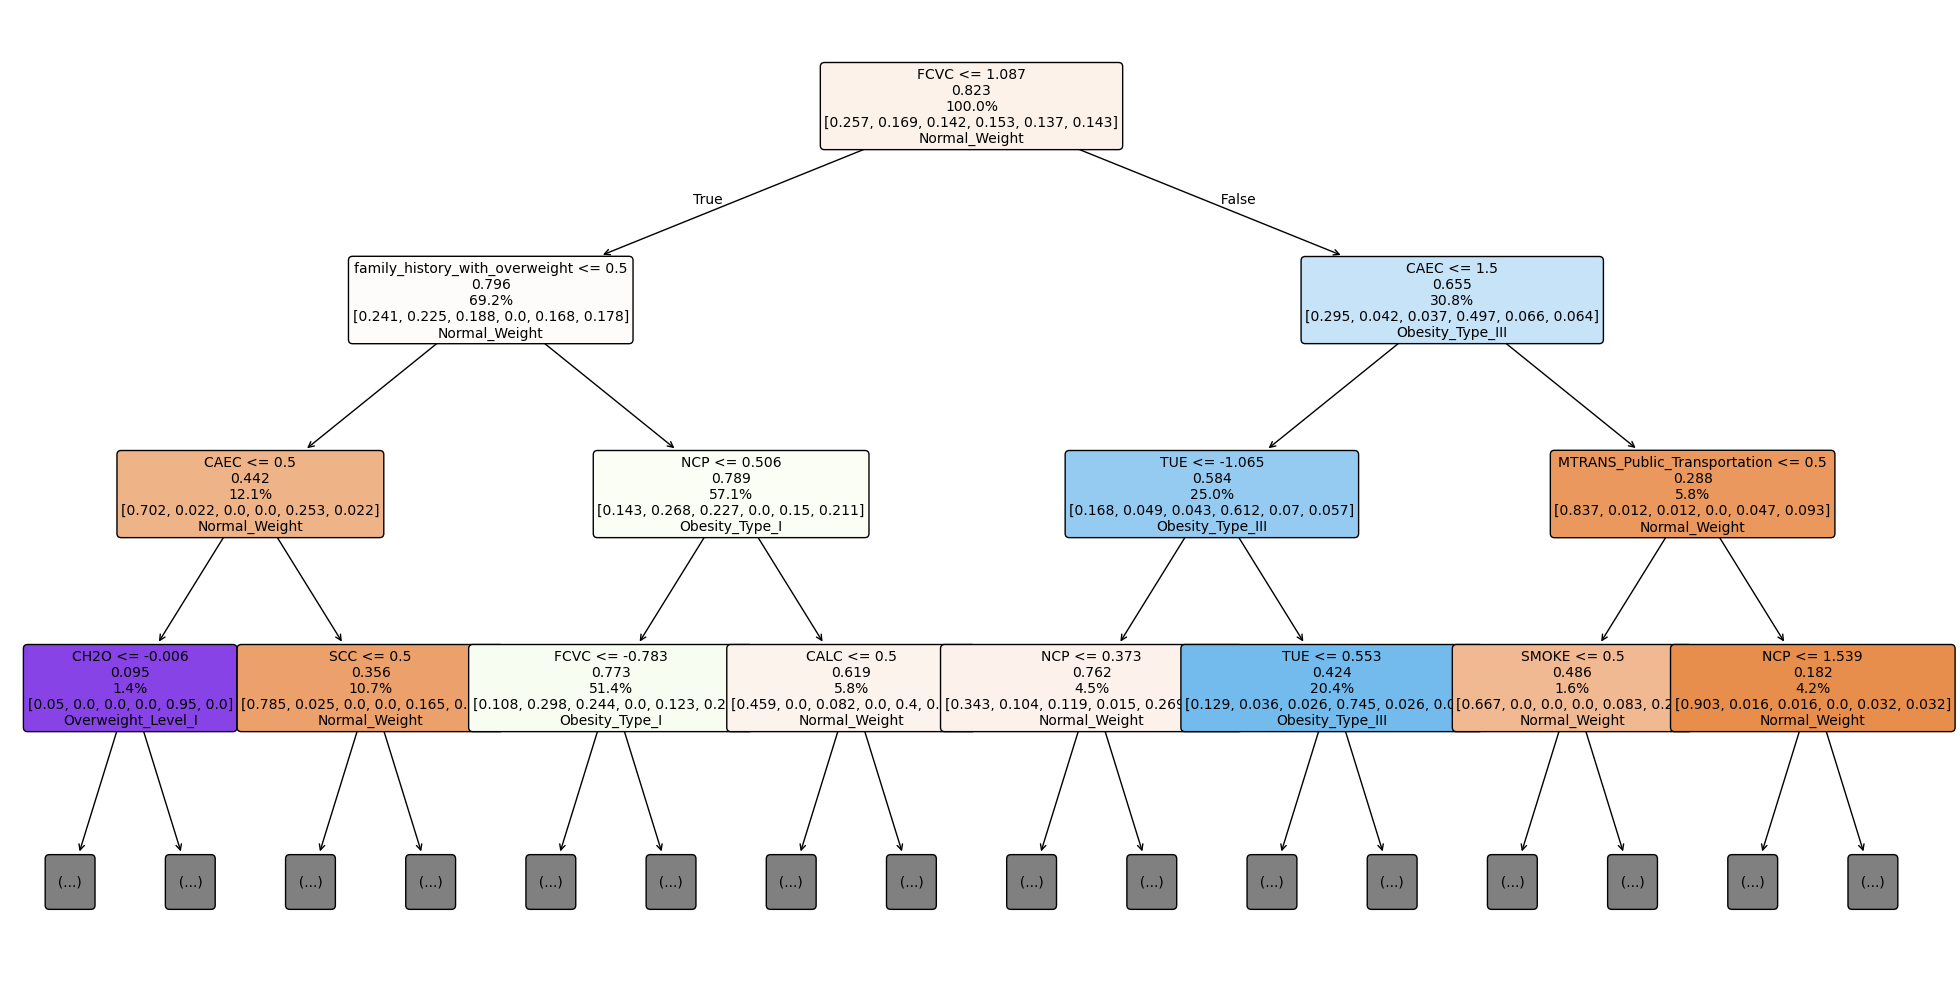

In [17]:
fig, ax = plt.subplots(figsize=(20, 10)) 
plot_tree(dtree,
          feature_names=X.columns,
          class_names=dtree.classes_,
          filled=True,
          label="none",  
          rounded=True,
          fontsize=10, 
          proportion=True,
          max_depth=3,
          ax=ax)
plt.tight_layout()
plt.savefig("decision_tree.pdf")
plt.show()